In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ipl=pd.read_csv('ipl-matches.csv')
ipl.sample(4)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
220,1178409,Delhi,2019-04-18,2019,34,Mumbai Indians,Delhi Capitals,Arun Jaitley Stadium,Mumbai Indians,bat,N,Mumbai Indians,Runs,40.0,NaN,HH Pandya,"['RG Sharma', 'Q de Kock', 'BCJ Cutting', 'SA ...","['PP Shaw', 'S Dhawan', 'C Munro', 'SS Iyer', ...",BNJ Oxenford,NJ Llong
852,392222,Centurion,2009-05-12,2009,42,Kings XI Punjab,Mumbai Indians,SuperSport Park,Kings XI Punjab,bat,N,Mumbai Indians,Wickets,8.0,NaN,Harbhajan Singh,"['S Sohal', 'SM Katich', 'IK Pathan', 'KC Sang...","['ST Jayasuriya', 'DJ Bravo', 'AM Rahane', 'SR...",SS Hazare,RE Koertzen
667,548343,Chennai,2012-04-28,2012,37,Chennai Super Kings,Kings XI Punjab,"MA Chidambaram Stadium, Chepauk",Kings XI Punjab,bat,N,Kings XI Punjab,Runs,7.0,NaN,Mandeep Singh,"['F du Plessis', 'S Badrinath', 'SK Raina', 'W...","['Mandeep Singh', 'SE Marsh', 'Azhar Mahmood',...",BF Bowden,SK Tarapore
912,336021,Mumbai,2008-05-16,2007/08,38,Mumbai Indians,Kolkata Knight Riders,Wankhede Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,8.0,NaN,SM Pollock,"['ST Jayasuriya', 'SR Tendulkar', 'RV Uthappa'...","['Salman Butt', 'A Chopra', 'SC Ganguly', 'DJ ...",BR Doctrove,DJ Harper


In [6]:
ipl.isnull().sum()   # all the null values

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [7]:
ipl.describe()

,ID,Margin
count,9.500000e+02,932.000000
mean,8.304852e+05,17.056867
std,3.375678e+05,21.633109
min,3.359820e+05,1.000000
25%,5.012612e+05,6.000000
50%,8.297380e+05,8.000000
75%,1.175372e+06,19.000000
max,1.312200e+06,146.000000


In [8]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [9]:
ipl.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [10]:
# matches having most null values
ipl[ipl['Player_of_Match'].isnull()].index


Index([205, 437, 464, 708], dtype='int64')

In [11]:
# method column has 931 missing values  ,so drop it
# Dropping matches having most null values
ipl.drop(columns='method',inplace=True)
ipl.drop(index=ipl[ipl['Player_of_Match'].isnull()].index,inplace=True)

In [12]:
ipl['Margin'].fillna(ipl['Margin'].mean(),inplace=True)  #filling null values wtih average

In [13]:
ipl.isnull().sum()

ID                  0
City               51
Date                0
Season              0
MatchNumber         0
Team1               0
Team2               0
Venue               0
TossWinner          0
TossDecision        0
SuperOver           0
WinningTeam         0
WonBy               0
Margin              0
Player_of_Match     0
Team1Players        0
Team2Players        0
Umpire1             0
Umpire2             0
dtype: int64

In [14]:
city_match_count=ipl['City'].value_counts()
city_match_count.head()

City
Mumbai       159
Kolkata       79
Delhi         77
Chennai       67
Hyderabad     64
Name: count, dtype: int64

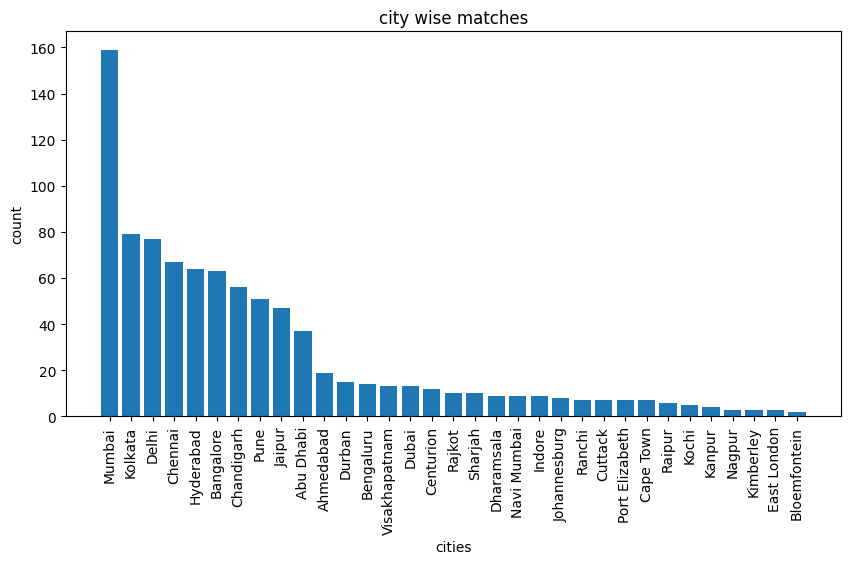

In [15]:
plt.figure(figsize=(10,5))
plt.bar(x=city_match_count.index,height=city_match_count.values)
plt.title('city wise matches')
plt.ylabel('count')
plt.xlabel('cities')
plt.xticks(rotation=90)
plt.show()

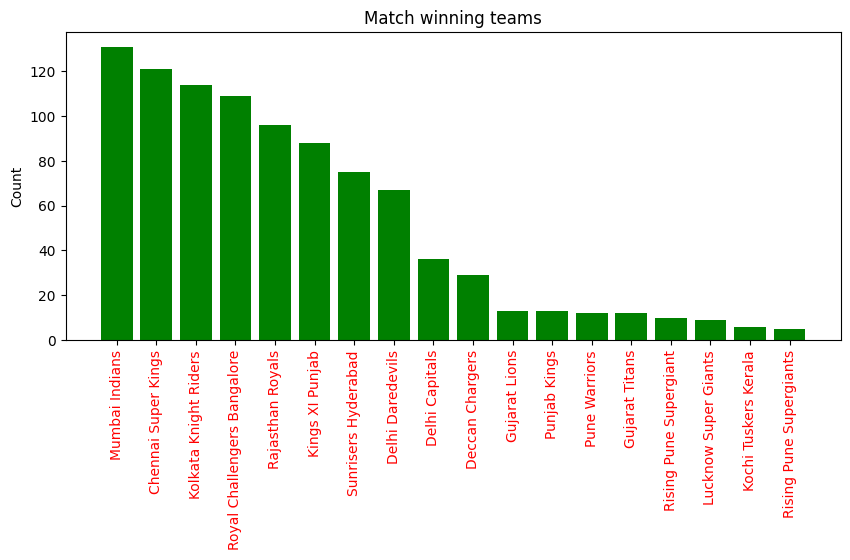

In [4]:
# Matches winned by every team
winn=ipl['WinningTeam'].value_counts()
plt.figure(figsize=(10,4))
plt.bar(winn.index,winn.values,color='green')
plt.title('Match winning teams')
plt.ylabel('Count')
plt.xticks(rotation=90,color='red')
plt.show()

In [18]:
specialmatch=ipl[~ipl['MatchNumber'].str.isdigit()]  #special matches like final,semi-final etc
specialmatch.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
74,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth


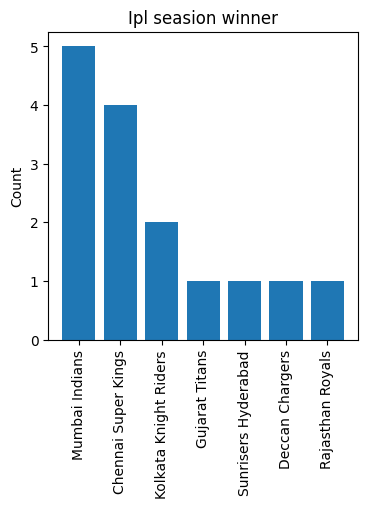

In [20]:
final=specialmatch[specialmatch['MatchNumber']=='Final']
winner=final['WinningTeam'].value_counts()
plt.figure(figsize=(4,4))
plt.bar(x=winner.index,height=winner.values)
plt.xticks(rotation='vertical')
plt.title('Ipl seasion winner')
plt.ylabel('Count')
plt.show()

In [31]:
 specialmatch_winning =specialmatch['WinningTeam'].value_counts().head(5)

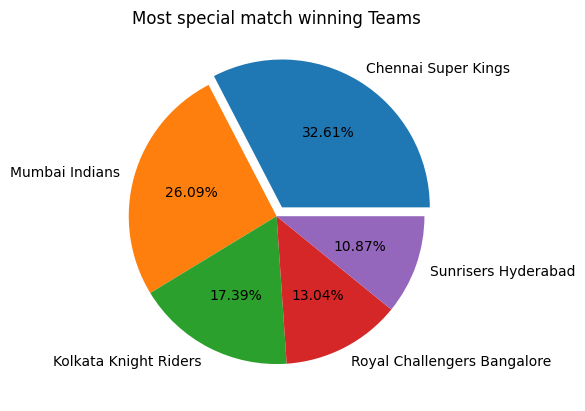

In [32]:
plt.pie(specialmatch_winning,
        labels=specialmatch_winning.index
       ,autopct='%1.2f%%',explode=[0.07,0,0,0,0])
plt.title('Most special match winning Teams')
plt.show()

In [17]:
man_of_match=ipl['Player_of_Match'].value_counts()
man_of_match.head(10)  #man of the matches

Player_of_Match
AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
YK Pathan         16
SR Watson         16
KA Pollard        14
SK Raina          14
V Kohli           14
Name: count, dtype: int64

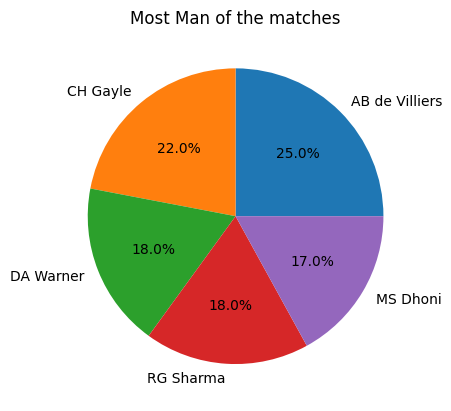

In [18]:

top5=man_of_match.head(5)
plt.pie(top5,autopct='%0.1f%%',labels=top5.index)
plt.title('Most Man of the matches')
plt.show()

In [21]:
most_winnings=ipl[ipl['WinningTeam']==ipl['TossWinner']]

In [22]:
most_winnings['WinningTeam'].value_counts()  #most toss winning is match winner

WinningTeam
Mumbai Indians                 70
Chennai Super Kings            68
Kolkata Knight Riders          64
Royal Challengers Bangalore    53
Rajasthan Royals               49
Kings XI Punjab                36
Delhi Daredevils               35
Sunrisers Hyderabad            34
Delhi Capitals                 21
Deccan Chargers                19
Gujarat Lions                  10
Gujarat Titans                  7
Rising Pune Supergiant          5
Punjab Kings                    4
Lucknow Super Giants            4
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Pune Warriors                   3
Name: count, dtype: int64

In [56]:
ipl.head(3)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough


In [23]:
ipl.sample(1)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
61,1304059,Mumbai,2022-04-05,2022,13,Rajasthan Royals,Royal Challengers Bangalore,"Wankhede Stadium, Mumbai",Royal Challengers Bangalore,field,N,Royal Challengers Bangalore,Wickets,4.0,KD Karthik,"['JC Buttler', 'YBK Jaiswal', 'D Padikkal', 'S...","['F du Plessis', 'Anuj Rawat', 'V Kohli', 'DJ ...",AK Chaudhary,HAS Khalid


<BarContainer object of 3 artists>

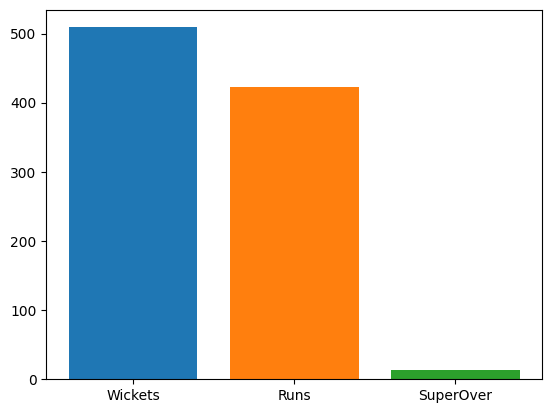

In [24]:
wonby=ipl['WonBy'].value_counts()
plt.bar(wonby.index,wonby.values,color=['#1f77b4', '#ff7f0e', '#2ca02c'])

In [25]:
ipl['Margin'].sort_values(ascending=False).head(10)

329    146.0
388    144.0
949    140.0
453    138.0
597    130.0
242    118.0
713    111.0
894    105.0
273    102.0
826     98.0
Name: Margin, dtype: float64

In [26]:
ipl[ipl['Margin']==max(ipl['Margin'])]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
329,1082635,Delhi,2017-05-06,2017,45,Delhi Daredevils,Mumbai Indians,Feroz Shah Kotla,Delhi Daredevils,field,N,Mumbai Indians,Runs,146.0,LMP Simmons,"['SV Samson', 'KK Nair', 'SS Iyer', 'RR Pant',...","['LMP Simmons', 'PA Patel', 'KA Pollard', 'RG ...",Nitin Menon,CK Nandan


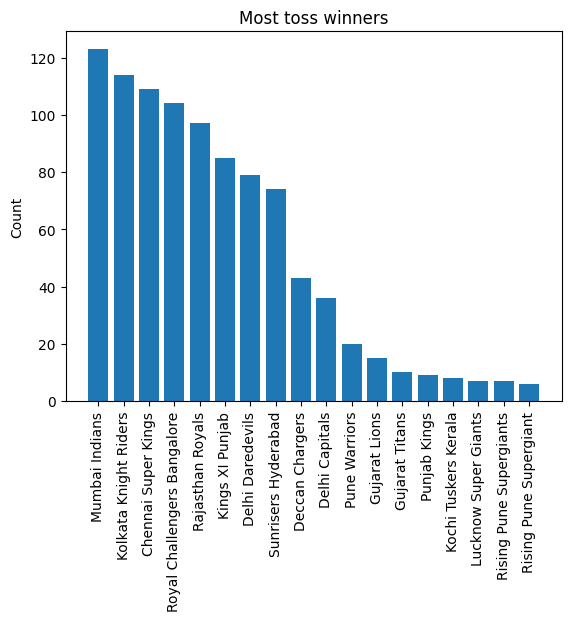

In [27]:
plt.bar(ipl['TossWinner'].value_counts().index,height=ipl['TossWinner'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Most toss winners')
plt.ylabel('Count')
plt.show()